## **Fase 6 - Machine Learning: Construcción y Evaluación del Modelo Predictivo**
*En esta fase, nos centramos en construir un modelo predictivo que sea capaz de estimar con precisión el **precio por noche** de las propiedades. Este paso es crucial para convertir los datos procesados en un conocimiento valioso, ya que nos permitirá hacer predicciones sobre el precio de futuras propiedades a partir de sus características. A través de técnicas de machine learning avanzadas, buscamos encontrar el modelo más eficiente, que no solo sea preciso, sino también interpretativo y generalizable*

A lo largo de esta fase, aplicaremos una serie de algoritmos y evaluaremos su rendimiento, seleccionando aquel que mejor se ajuste a nuestras necesidades. Además, dedicaremos tiempo a ajustar los parámetros del modelo para maximizar su capacidad predictiva, asegurando así que sea robusto y confiable.
Con este enfoque, buscamos no solo predecir el precio de forma precisa, sino también proporcionar una comprensión profunda de los factores clave que afectan los precios de las propiedades, lo que puede ser útil en la toma de decisiones empresariales y en el desarrollo de futuras investigaciones.

In [21]:
# General
import pandas as pd
import numpy as np

# Escaladores
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Modelos
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Neural Neutworks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Hiperparametrización
from sklearn.model_selection import GridSearchCV

# Métricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

In [2]:
df_encoded = pd.read_csv('data\df_processed_ML.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\diogo\AppData\Local\Temp\ipykernel_15732\3088068979.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_encoded = pd.read_csv('data\df_processed_ML.csv')


In [3]:
df_encoded

,prices_per_night,ratings,cleaning_fee,dormitorios,camas,baños,maximum_guests,check_in_hour,check_out_hour,total_hours_checkin,...,dormitorio y lavandería,entretenimiento,exterior,internet y oficina,para familias,privacidad y seguridad,seguridad en el hogar,servicios,habitacion,alojamiento entero
0,115.0,0.00,0.0,1.0,1.0,1.0,2.0,900.0,720.0,9.0,...,7.0,1.0,2.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0
1,46.0,0.00,15.0,1.0,1.0,0.5,1.0,1020.0,660.0,7.0,...,6.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0
2,47.0,4.66,0.0,1.0,1.0,0.5,1.0,900.0,720.0,9.0,...,8.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0
3,100.0,4.89,35.0,1.0,1.0,1.0,1.0,960.0,720.0,8.0,...,10.0,10.0,3.0,2.0,2.0,0.0,5.0,4.0,0.0,0.0
4,33.0,4.40,0.0,1.0,1.0,0.5,1.0,900.0,660.0,9.0,...,4.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,55.0,4.74,10.0,1.0,1.0,0.5,3.0,900.0,660.0,9.0,...,7.0,1.0,0.0,2.0,0.0,3.0,0.0,1.0,1.0,0.0
2493,60.0,4.78,0.0,1.0,1.0,0.5,2.0,900.0,600.0,9.0,...,4.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2494,104.0,4.96,0.0,2.0,3.0,2.0,4.0,900.0,720.0,9.0,...,9.0,1.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,0.0
2495,120.0,4.83,50.0,1.0,1.0,1.0,2.0,900.0,660.0,9.0,...,8.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0


**Train Test Split**

In [4]:
X = df_encoded.drop("prices_per_night", axis = 1)
y = df_encoded["prices_per_night"]
print(X.shape, y.shape)

(2497, 25) (2497,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (1997, 25), y_train: (1997,)
X_test: (500, 25), y_test: (500,)


**Escaladores**

In [6]:
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = y_scaler.transform(np.array(y_test).reshape(-1, 1))

In [7]:
# Crear un DataFrame combinando los datos escalados
df_X = pd.DataFrame(
    np.vstack([X_train, X_test]), 
    columns=[f"X_feature_{i}" for i in range(X_train.shape[1])]
)
df_X["Set"] = ["Train"] * len(X_train) + ["Test"] * len(X_test)

df_y = pd.DataFrame(
    np.vstack([y_train, y_test]), 
    columns=["y"]
)
df_y["Set"] = ["Train"] * len(y_train) + ["Test"] * len(y_test)

# Concatenar las características y las etiquetas
df = pd.concat([df_X, df_y["y"]], axis=1)


In [8]:
# Crear DataFrame 
Scaler = pd.DataFrame(df)
#Creamos el pickle
Scaler.to_pickle("data/Scaler.pkl")

In [9]:
Scaler

,X_feature_0,X_feature_1,X_feature_2,X_feature_3,X_feature_4,X_feature_5,X_feature_6,X_feature_7,X_feature_8,X_feature_9,...,X_feature_17,X_feature_18,X_feature_19,X_feature_20,X_feature_21,X_feature_22,X_feature_23,X_feature_24,Set,y
0,0.882,0.000000,0.2,0.000000,0.1,0.0,0.761905,0.400000,0.238095,0.600429,...,0.0,0.333333,0.000000,0.166667,0.000000,0.142857,1.0,0.0,Train,0.046083
1,0.956,0.000000,0.2,0.000000,0.1,0.1,0.666667,0.300000,0.333333,0.565941,...,0.0,0.666667,0.000000,0.333333,0.000000,0.285714,1.0,0.0,Train,0.055300
2,0.000,0.264706,0.2,0.000000,0.1,0.0,0.714286,0.300000,0.285714,0.000000,...,0.0,0.333333,0.000000,0.166667,0.000000,0.000000,1.0,0.0,Train,0.034562
3,0.000,0.000000,0.2,0.066667,0.1,0.1,0.714286,0.233333,0.285714,0.000000,...,0.0,0.333333,0.000000,0.333333,0.000000,0.000000,1.0,0.0,Train,0.101382
4,0.000,0.000000,0.2,0.000000,0.1,0.1,0.571429,0.166667,0.428571,0.000000,...,0.0,0.333333,0.000000,0.333333,0.000000,0.000000,1.0,0.0,Train,0.062212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,0.942,0.000000,0.2,0.000000,0.1,0.0,0.666667,0.300000,0.333333,0.389728,...,0.0,0.666667,0.111111,0.000000,0.333333,0.142857,1.0,0.0,Test,0.041475
2493,0.000,0.205882,0.2,0.000000,0.1,0.1,0.714286,0.200000,0.285714,0.000000,...,0.0,0.333333,0.000000,0.166667,0.000000,0.000000,1.0,0.0,Test,0.025346
2494,1.000,0.041176,0.2,0.000000,0.1,0.0,0.714286,0.200000,0.285714,0.000000,...,0.2,0.666667,0.111111,0.333333,0.000000,0.428571,1.0,0.0,Test,0.078341
2495,0.978,0.000000,0.2,0.000000,0.1,0.1,0.619048,0.300000,0.380952,0.000000,...,0.0,0.333333,0.000000,0.166667,0.000000,0.000000,1.0,0.0,Test,0.101382


**Selección de los Modelos**
- Evaluaremos cada modelo mediante las **métricas de rendimiento**, tales como el **Error Cuadrático Medio (RMSE)** y el **R^2**, con el fin de seleccionar el que brinde el mejor rendimiento predictivo.

In [10]:
# Definimos los modelos
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "MLP Regressor": MLPRegressor(random_state=42)
}

In [11]:
# Lista para almacenar los resultados
resultados_lista = []

# Bucle para entrenar cada modelo y calcular métricas
for model_name, model in models.items():
    model.fit(X_train, y_train.ravel())
    
    y_hat = model.predict(X_test)
    
    # Desescalado de las predicciones
    y_test_inv = y_scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()
    y_hat_inv = y_scaler.inverse_transform(y_hat.reshape(-1, 1)).ravel()
    
    # Cálculo de métricas
    mae = mean_absolute_error(y_test_inv, y_hat_inv)
    mse = mean_squared_error(y_test_inv, y_hat_inv)
    rmse = root_mean_squared_error(y_test_inv, y_hat_inv)
    r2 = r2_score(y_test_inv, y_hat_inv)
    
    # Almacenar resultados
    resultados_lista.append({
        "model_name": model_name,
        "mae": mae,
        "mse": mse,
        "rmse" : rmse,
        "r2_score": r2
    })



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 1997, number of used features: 24
[LightGBM] [Info] Start training from score 0.143845


In [12]:
# Crear DataFrame y ordenar por r2_score
resultados = pd.DataFrame(resultados_lista)
resultados = resultados.sort_values(by="r2_score", ascending=False)
#Creamos el pickle
resultados.to_pickle("data/resultados_modelos.pkl")

In [13]:
resultados

,model_name,mae,mse,rmse,r2_score
5,LightGBM,9.727440,244.834744,15.647196,0.860073
1,Random Forest,8.654486,265.400936,16.291131,0.848319
4,XGBoost,8.297636,292.500981,17.102660,0.832831
3,Gradient Boosting,13.716214,376.139506,19.394316,0.785031
0,Linear Regression,17.901984,615.842171,24.816168,0.648037
6,MLP Regressor,19.023449,636.524040,25.229428,0.636217
2,Support Vector Regressor,20.278318,652.793475,25.549823,0.626919


**Ajuste de Hiperparámetros**
   - Para maximizar el rendimiento del modelo, ajustaremos los hiperparámetros clave utilizando **Grid Search**. Este paso es crucial para obtener el mejor modelo posible para nuestros datos.

In [14]:
lgb = LGBMRegressor(random_state=42) # Quizas el objective se pone aquí
param_grid = {
    'n_estimators': [100, 500, 1000],
    'num_leaves': [31, 63, 127],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_samples': [20, 50],
    'subsample': [0.7, 0.8],
    'reg_lambda': [0, 1],
    'reg_alpha': [0, 1],
    'boosting_type': ['gbdt', 'dart'],
    'objective': ['regression']
}

In [15]:
grid_search = GridSearchCV(estimator=lgb, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=3, 
                           verbose=1, n_jobs=-1)

In [16]:
%%time

grid_search.fit(X_train, y_train)
# Mostramos los mejores parámetros y resultados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# comprobamos los  mejores parámetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculamos y mostramos las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE", rmse)
print("R²:", r2)

Fitting 3 folds for each of 2592 candidates, totalling 7776 fits


c:\Users\diogo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 1997, number of used features: 24
[LightGBM] [Info] Start training from score 0.143845
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

Creación del pickle

In [17]:
# Creamos un diccionario con los resultados
grid_search = {
    "best_params": best_params,
    "mae": mae,
    "mse": mse,
    "rmse": rmse,
    "r2_score": r2
}

grid_search = pd.DataFrame(grid_search)
grid_search = grid_search.sort_values(by="r2_score", ascending=False)
#Creamos el pickle
grid_search.to_pickle("data/resultados_gridsearch.pkl")

In [18]:
grid_search

,best_params,mae,mse,rmse,r2_score
boosting_type,gbdt,0.016778,0.001221,0.034942,0.868567
learning_rate,0.1,0.016778,0.001221,0.034942,0.868567
max_depth,10,0.016778,0.001221,0.034942,0.868567
min_child_samples,20,0.016778,0.001221,0.034942,0.868567
n_estimators,1000,0.016778,0.001221,0.034942,0.868567
num_leaves,31,0.016778,0.001221,0.034942,0.868567
objective,regression,0.016778,0.001221,0.034942,0.868567
reg_alpha,0,0.016778,0.001221,0.034942,0.868567
reg_lambda,0,0.016778,0.001221,0.034942,0.868567
subsample,0.7,0.016778,0.001221,0.034942,0.868567


Neural Networks

In [19]:
# Cargar los dados escalados en el ultimo modelo
df = pd.read_pickle("data/Scaler.pkl")

# Filtrar os dados de treino e teste
X_train = df[df['Set'] == 'Train'].drop(columns=['y', 'Set'])
X_test = df[df['Set'] == 'Test'].drop(columns=['y', 'Set'])
y_train = df[df['Set'] == 'Train']['y']
y_test = df[df['Set'] == 'Test']['y']

In [22]:
model = Sequential()

# Camada de entrada
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Camadas ocultas
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Camada de saída
model.add(Dense(units=1))  # Apenas una salida para el precio

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

c:\Users\diogo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0158 - val_loss: 0.0041
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0051 - val_loss: 0.0035
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046 - val_loss: 0.0033
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 12/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0

In [ ]:
test_loss = model.evaluate(X_test, y_test)
print(f"Perda en el conjunto de teste: {test_loss}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022  
Perda no conjunto de teste: 0.0021274923346936703


In [25]:
predictions = model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


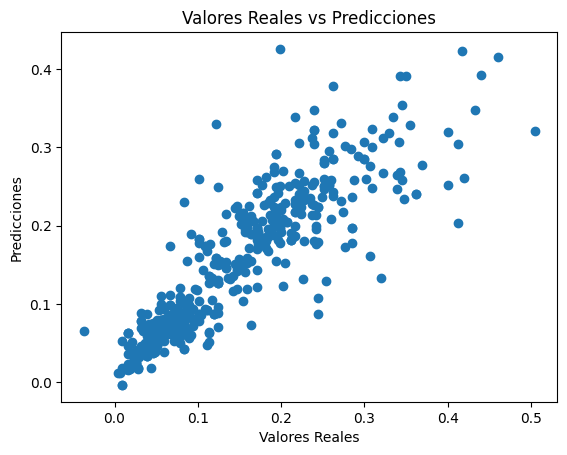

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

In [ ]:
import plotly.express as px

# Graficar el resultado del entrenamiento del modelo usando plotly
resultados_df = pd.DataFrame({
    "Valores Reales": y_test,
    "Predicciones": predictions.ravel() # predictions tiene 2D, ravel para transformar en 1D para la creación del df
})

fig = px.scatter(
    resultados_df,
    x="Valores Reales",
    y="Predicciones",
    title="Valores Reales vs Predicciones",
    template="plotly_white"
)

# Añadir una línea de referencia donde las predicciones coinciden perfectamente con los valores reales
fig.add_shape(
    type="line",
    x0=resultados_df["Valores Reales"].min(),
    y0=resultados_df["Valores Reales"].min(),
    x1=resultados_df["Valores Reales"].max(),
    y1=resultados_df["Valores Reales"].max(),
    line=dict(color="red", dash="dot")
)

fig.show()